# Data exploration 

In [1]:
# Basic imports
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [8]:
# import cleaned and outlier corrected data
df = pd.read_csv("data/data_clean_outlier.csv", index_col=0) 

# set random state
RSEED = 42

In [19]:
# randomly subset data for initial plots 
subset = df.sample(n=1000, random_state=RSEED, axis=0)

In [10]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 161066 to 108526
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backers_count          10000 non-null  int64  
 1   country                10000 non-null  object 
 2   disable_communication  10000 non-null  bool   
 3   id                     10000 non-null  int64  
 4   is_starrable           10000 non-null  bool   
 5   name                   10000 non-null  object 
 6   staff_pick             10000 non-null  int64  
 7   state                  10000 non-null  int64  
 8   usd_pledged            10000 non-null  float64
 9   usd_type               9998 non-null   object 
 10  yr_launched            10000 non-null  int64  
 11  mo_launched            10000 non-null  int64  
 12  wd_launched            10000 non-null  int64  
 13  yr_deadline            10000 non-null  int64  
 14  mo_deadline            10000 non-null  int64  
 

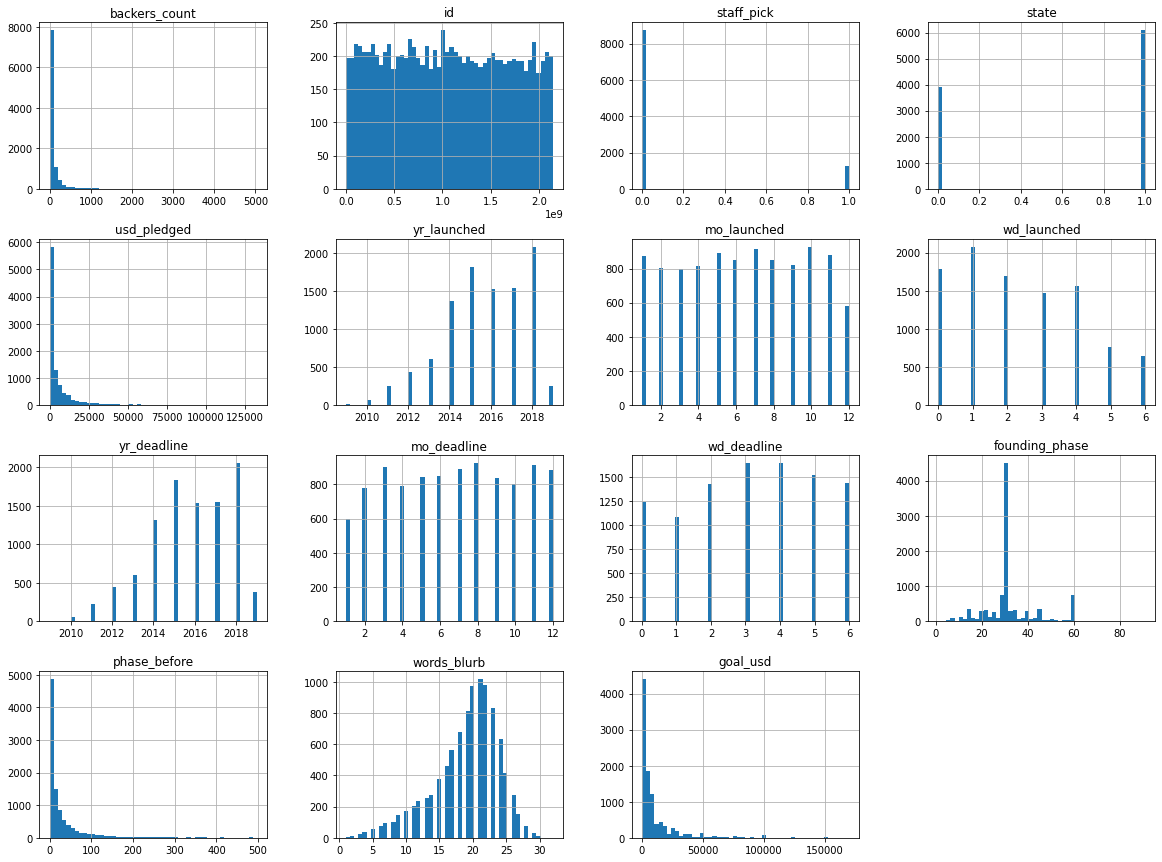

In [12]:
subset.hist(bins=50, figsize = (20,15))
plt.show()

In [14]:
subset.describe().round(2)

,backers_count,id,staff_pick,state,usd_pledged,yr_launched,mo_launched,wd_launched,yr_deadline,mo_deadline,wd_deadline,founding_phase,phase_before,words_blurb,goal_usd
count,10000.00,1.000000e+04,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,94.12,1.059323e+09,0.13,0.61,6871.72,2015.66,6.42,2.38,2015.72,6.71,3.17,31.92,34.09,18.98,10869.49
std,231.35,6.197232e+08,0.33,0.49,14529.58,2.01,3.37,1.81,2.01,3.38,1.93,11.56,64.98,4.96,18949.02
min,0.00,4.658800e+04,0.00,0.00,0.00,2009.00,1.00,0.00,2009.00,1.00,0.00,1.00,0.00,1.00,0.89
25%,5.00,5.234676e+08,0.00,0.00,152.94,2014.00,4.00,1.00,2014.00,4.00,2.00,29.00,2.00,16.00,1300.00
50%,29.00,1.051839e+09,0.00,1.00,1627.73,2016.00,6.00,2.00,2016.00,7.00,3.00,30.00,10.00,20.00,4500.00
75%,87.00,1.594095e+09,0.00,1.00,6400.50,2017.00,9.00,4.00,2017.00,10.00,5.00,33.00,34.00,22.00,10524.20
max,5033.00,2.146227e+09,1.00,1.00,132640.32,2019.00,12.00,6.00,2019.00,12.00,6.00,91.00,497.00,32.00,170000.00


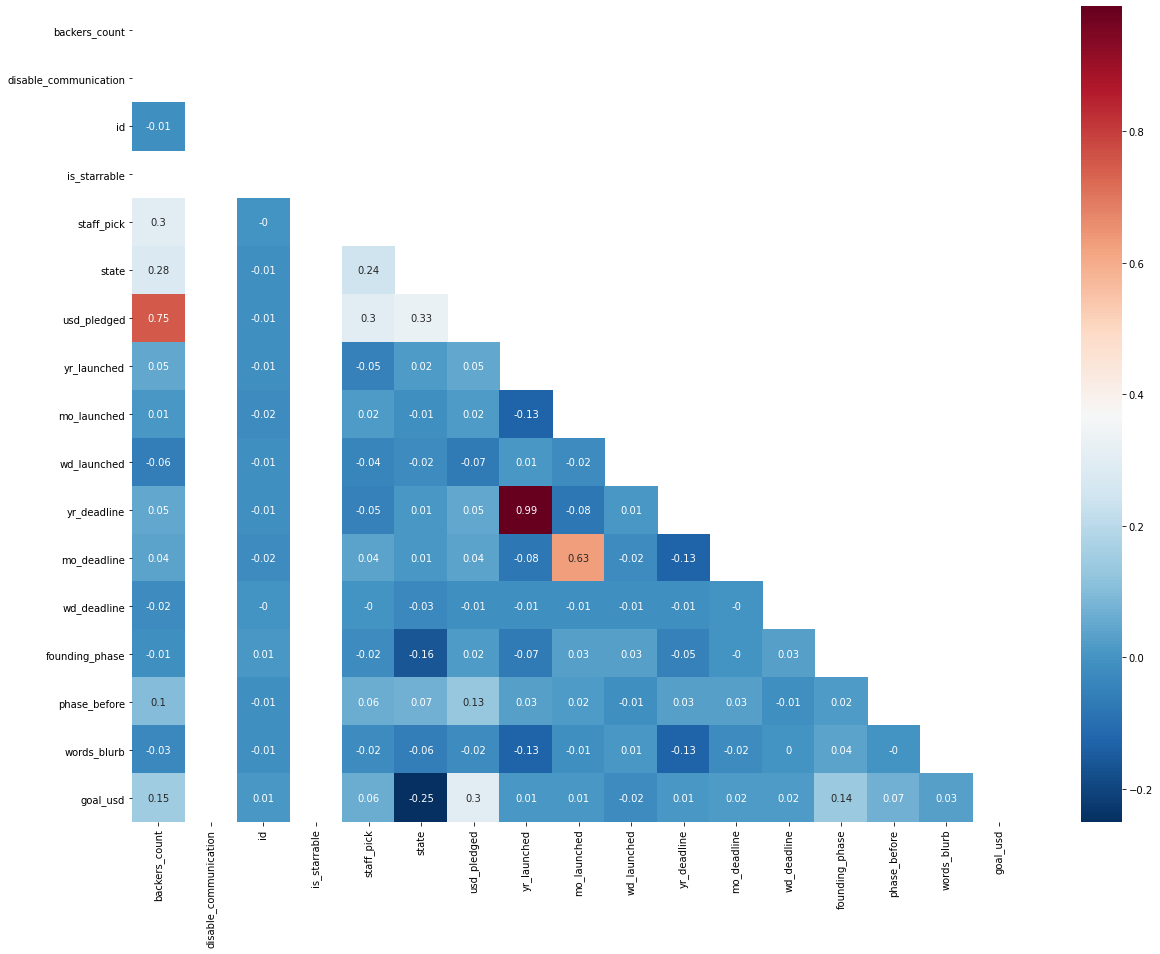

In [15]:
mask = np.triu(subset.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(subset.corr(), 2)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

In [17]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 161066 to 108526
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backers_count          10000 non-null  int64  
 1   country                10000 non-null  object 
 2   disable_communication  10000 non-null  bool   
 3   id                     10000 non-null  int64  
 4   is_starrable           10000 non-null  bool   
 5   name                   10000 non-null  object 
 6   staff_pick             10000 non-null  int64  
 7   state                  10000 non-null  int64  
 8   usd_pledged            10000 non-null  float64
 9   usd_type               9998 non-null   object 
 10  yr_launched            10000 non-null  int64  
 11  mo_launched            10000 non-null  int64  
 12  wd_launched            10000 non-null  int64  
 13  yr_deadline            10000 non-null  int64  
 14  mo_deadline            10000 non-null  int64  
 

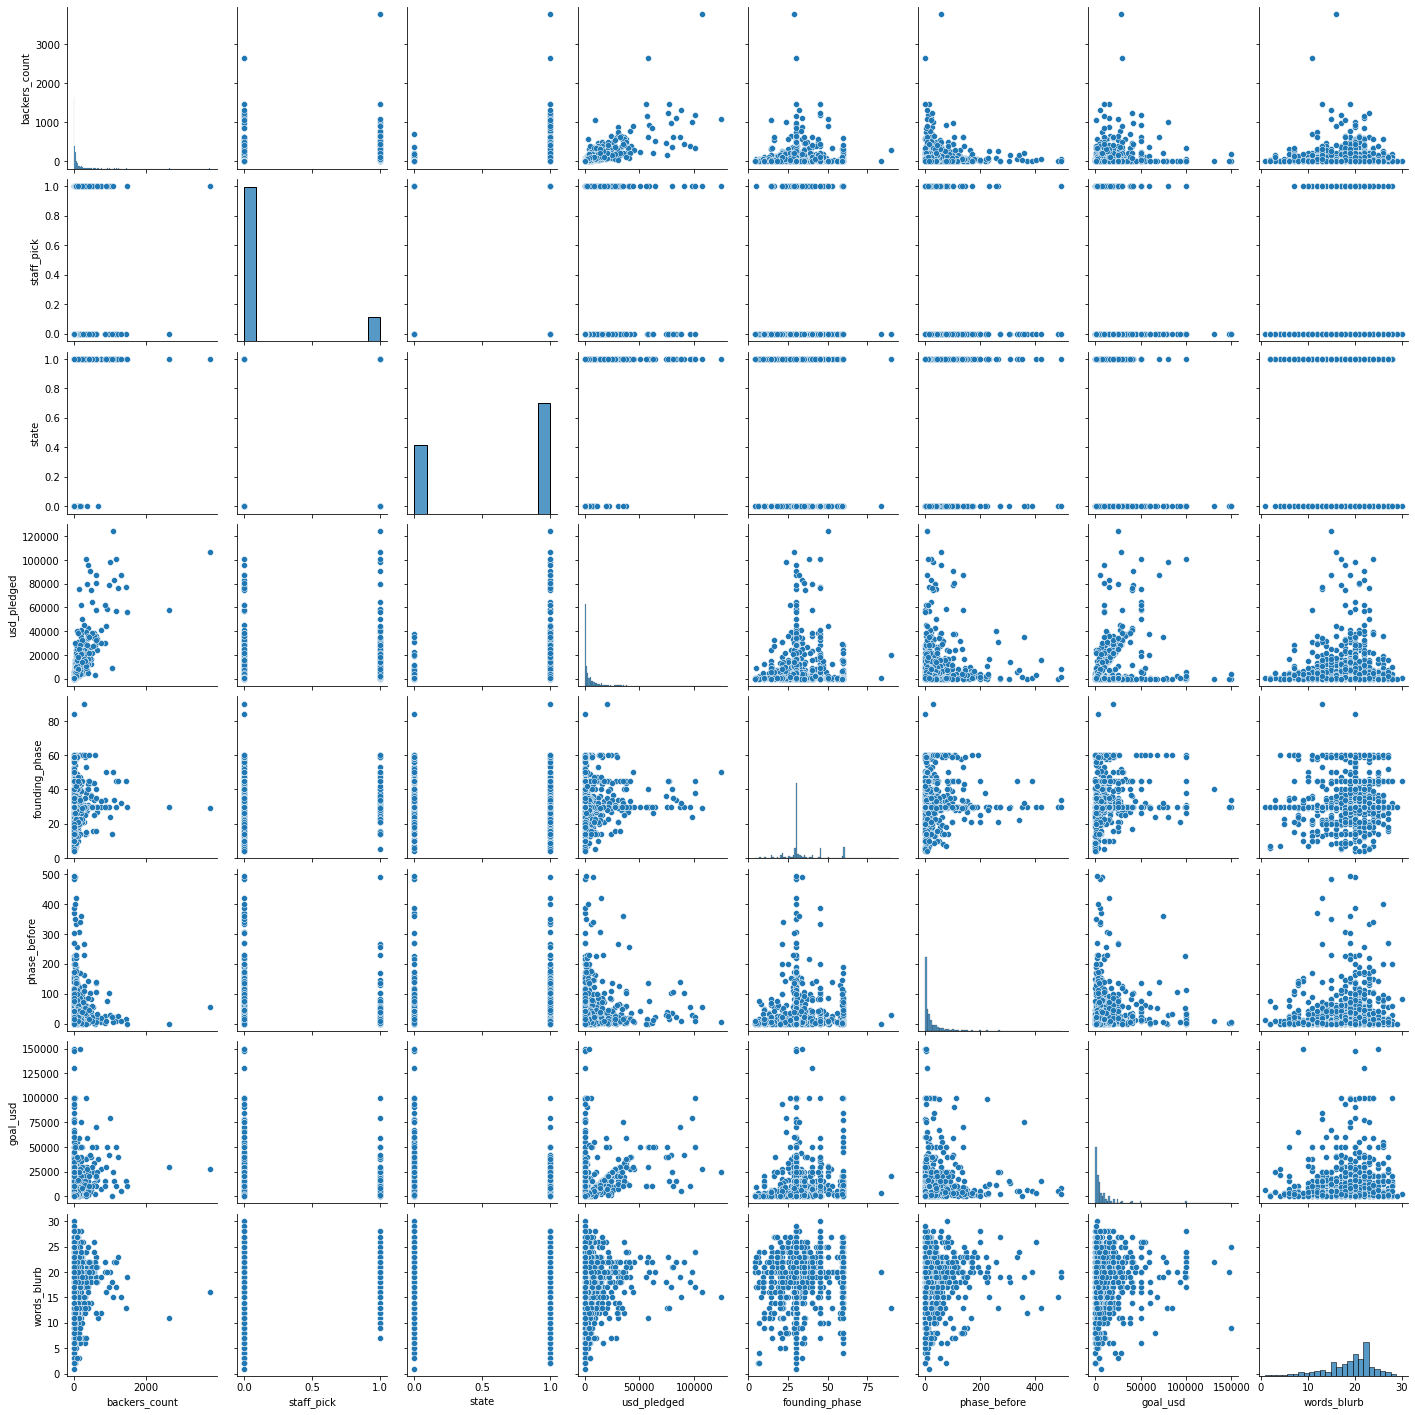

In [21]:
columns_intrest = ['backers_count', 'staff_pick', 'state', 'usd_pledged', 'founding_phase', 'phase_before', 'goal_usd', 'words_blurb']

# geting a feeling of the data
subset_features = subset[columns_intrest]
sns.pairplot(subset_features);

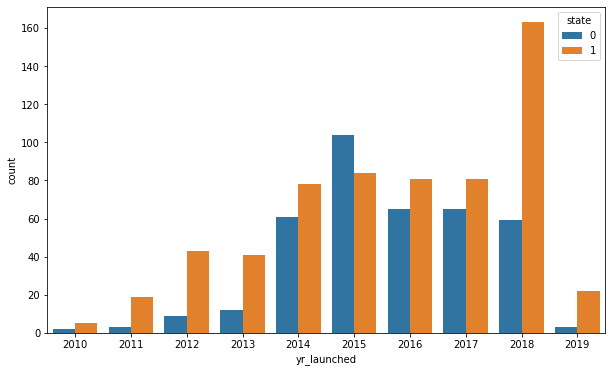

In [22]:
plt.figure(figsize=(10,6));
sns.countplot(x='yr_launched', hue='state', data=subset);

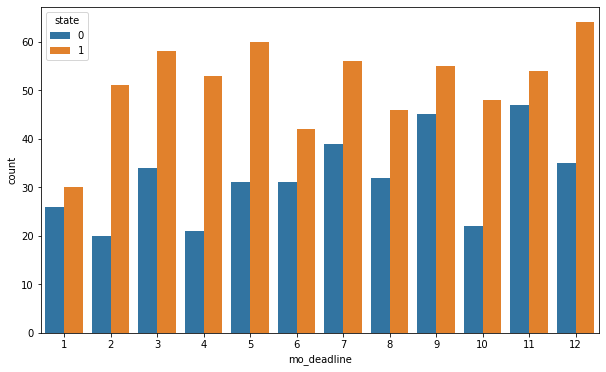

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='mo_deadline', hue='state', data=subset);

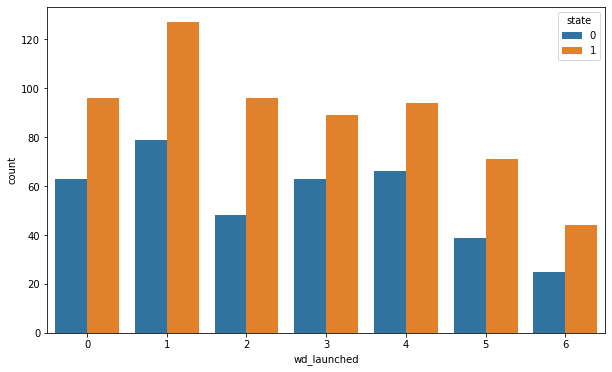

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='wd_launched', hue='state', data=subset);

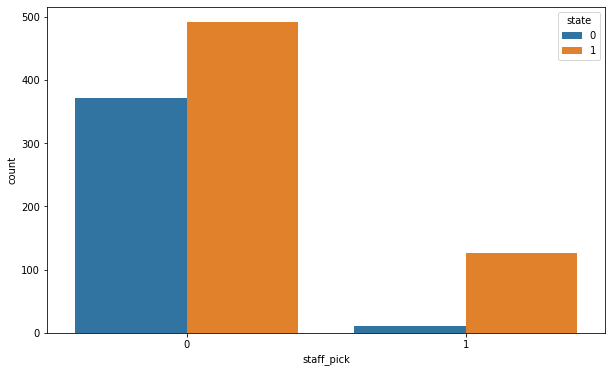

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='staff_pick', hue='state', data=subset);

In [39]:
#plt.figure(figsize=(10,6))
#sns.catplot(x='wd_deadline', hue='state', row='yr_deadline', kind='count' ,data=subset)

<Figure size 720x432 with 0 Axes>

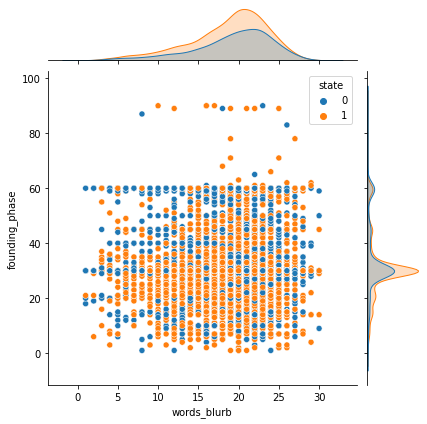

In [45]:
plt.figure(figsize=(10,6))
sns.jointplot(data = subset, x = "words_blurb", y = "founding_phase", hue = "state")

(0.0, 1000.0)

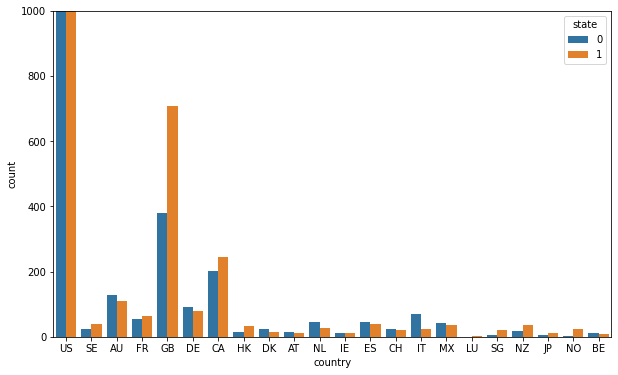

In [73]:
plt.figure(figsize=(10,6));
sns.countplot(x='country', hue='state', data=subset);
plt.ylim(0,1000);

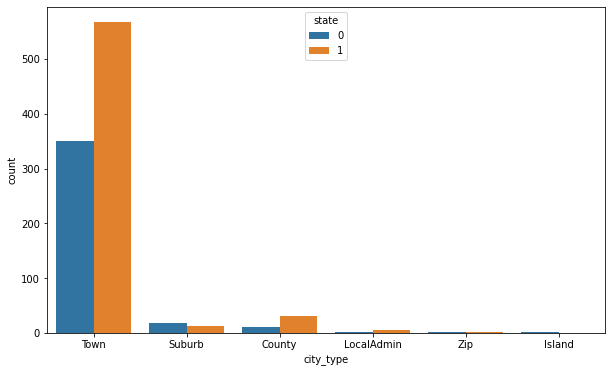

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='city_type', hue='state', data=subset);

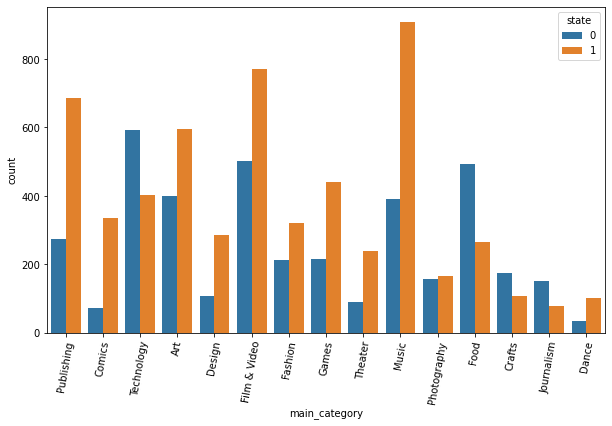

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(x='main_category', hue='state', data=subset);
plt.xticks(rotation='80');